# pyEnGNet code explanation

## Imports

In [62]:
import pandas as pd
from pyEnGNet import PyEnGNet
import networkx as nx

# Obtención de la matriz de datos
La clase PyEnGNet recibe una matriz de datos en su constructor. Estos datos son utilizados para la obtención de un grafo que represente las aristas con correlaciones de mayor importancia del conjunto.

In [63]:
df = pd.read_csv("Data/113_exp_mat_cond_1.csv")
df = df.drop(df.columns[[0,2]], axis=1)
data = df.to_numpy()
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.393726,0.052912,0.079489,0.110079,0.076913,0.170031,0.076548,0.378425,0.069374,-0.024883,...,0.135870,0.555923,0.053774,0.063177,0.120053,0.511716,0.171683,0.181483,0.186592,0.166621
1,0.368257,0.192921,0.304331,0.347783,0.460730,0.247321,0.488002,0.395741,0.336612,0.395995,...,0.368265,0.436692,0.331386,0.396856,0.187229,0.297722,0.384049,0.422091,0.349731,0.260438
2,0.500661,0.480420,0.449263,0.462302,0.332204,0.347251,0.346586,0.356450,0.509264,0.486996,...,0.452821,0.340253,0.482209,0.524972,0.486942,0.474888,0.435856,0.357013,0.610022,0.443499
3,0.418802,0.333717,0.295416,0.313251,0.385264,0.350356,0.435079,0.418417,0.390439,0.357992,...,0.350447,0.329192,0.426531,0.389524,0.412562,0.483822,0.332376,0.317330,0.387120,0.373825
4,0.528209,0.466775,0.390307,0.547182,0.436885,0.585211,0.542756,0.565251,0.436395,0.460720,...,0.413356,0.582158,0.484834,0.523137,0.522180,0.286004,0.642618,0.526924,0.584369,0.533382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.518182,0.514139,0.538879,0.463914,0.420827,0.638548,0.450177,0.619931,0.414552,0.530368,...,0.545532,0.538625,0.435721,0.473603,0.701581,0.552184,0.544960,0.544448,0.543322,0.565474
109,0.679404,0.619771,0.718633,0.454273,0.554298,0.823445,0.462051,0.778620,0.607679,0.716958,...,0.637161,0.611109,0.622095,0.464864,0.763002,0.690760,0.697808,0.589683,0.568464,0.537067
110,0.716606,0.675982,0.752573,0.653249,0.656137,0.803875,0.610495,0.758321,0.646875,0.592495,...,0.782004,0.693562,0.580309,0.642324,0.659733,0.711134,0.755975,0.877445,0.751245,0.662435
111,0.659796,0.594530,0.635661,0.498229,0.605627,0.757235,0.567830,0.641744,0.538927,0.681520,...,0.606450,0.596641,0.561738,0.496406,0.738552,0.610183,0.640114,0.689054,0.546962,0.618393


In [64]:
peg = PyEnGNet(data)
print(peg)

PyEnGNet Object with shape (113,180)


Our dataset is now ready to be used and apply correlation techniques

# Funcionamiento normal
Primero hacemos un cruce entre los resultados de aplicar diversas técnicas de correlación

In [65]:
aristas = peg.engnet_1_0()
newhead = ["GenA", "GenB", "Weight"]
pd.DataFrame(aristas, columns=newhead)

,GenA,GenB,Weight
0,8,55,{'weight': 0.7089923579941719}
1,43,52,{'weight': 0.7155115996731671}
2,43,55,{'weight': 0.7462321210562424}
3,47,61,{'weight': 0.7041228657045737}
4,47,66,{'weight': 0.7199583800134501}
5,52,66,{'weight': 0.7473299128183515}
6,52,74,{'weight': 0.7180753552255581}
7,55,57,{'weight': 0.7228738030320297}
8,55,74,{'weight': 0.7277715940754805}
9,57,60,{'weight': 0.7175741808144404}


Para obtener estas aristas, se ha sometido cada par de genes de los datos a tres medidas de correlación distintas:

   - Coeficiente de correlación de Pearson

   - Coeficiente de correlación de Spearman

   - Coeficiente de correlación de rango de Kendall

Tras obtener los resultados de los tres, si la mayoría ha superado un umbral indicado individualmente por el usuario, se considera que la relación entre ambos genes es válida y se añade a la lista de aristas del grafo junto con un peso.

El peso de la arista es el resultado de calcular la media de los coeficientes que han formado la mayoría en la votación.

# Representación del grafo actual

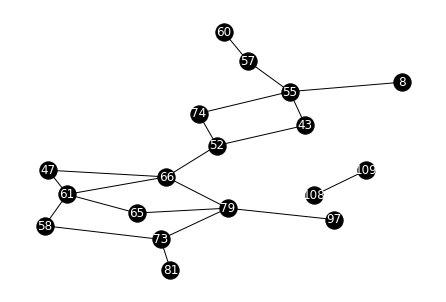

In [66]:
G = nx.Graph()
G.add_edges_from(aristas)

options = {
    'node_color': 'black',
    'font_color': 'white',
    'with_labels': True
}

nx.draw_kamada_kawai(G, **options)

Ahora queremos encontrar el árbol de recubrimiento máximo sobre este árbol

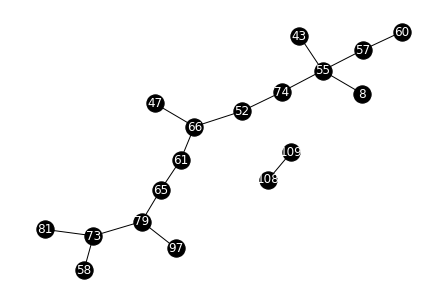

In [67]:
G2 = nx.maximum_spanning_tree(G, weight='weight', algorithm="kruskal")
nx.draw_kamada_kawai(G2, **options)

In [68]:
lista_edges = nx.to_edgelist(G2)
newhead = ["GenA", "GenB", "Weight"]
pd.DataFrame(lista_edges, columns=newhead)

,GenA,GenB,Weight
0,8,55,{'weight': 0.7089923579941719}
1,55,43,{'weight': 0.7462321210562424}
2,55,74,{'weight': 0.7277715940754805}
3,55,57,{'weight': 0.7228738030320297}
4,52,66,{'weight': 0.7473299128183515}
5,52,74,{'weight': 0.7180753552255581}
6,47,66,{'weight': 0.7199583800134501}
7,61,66,{'weight': 0.7131274260858367}
8,61,65,{'weight': 0.7111088554638296}
9,57,60,{'weight': 0.7175741808144404}
